Соревнование на kaggle "Titanic" - https://www.kaggle.com/c/titanic/code

**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

- survival: Survival. 0 = No, 1 = Yes
- pclass: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Sex	
- Age: Age in years	
- sibsp: of siblings / spouses aboard the Titanic
- parch: of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

## 1.2 Загрузка данных общее описание набора данных
* Первый взгляд на данные: head(), tail(), sample()
* Размер набора данных
* Баланс классов в целевом признаке при классфикации. Диапазон данных и базовые статистические метрики целевого признака при регерессии
* Базовые статистики по числовым данным
* Базовые статистики по строковым данным
* Наличие пропусков в данных

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Не видим наличие достаточно сильного дисбаланса классов

In [6]:
df['Survived'].value_counts(normalize=True)

0    0.6162
1    0.3838
Name: Survived, dtype: float64

In [13]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


**Первичные выводы**
* Выжило около 40% пассажиров, что немало
* В среднем на борту были люди от 20 до 40 лет
* Большинство пассажиров были во 2 или в 3 классе, если судить по билету
* Большинство присутствовало на корабле без родственников-суженых или детей-родителей

In [15]:
df.describe(include=(object))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* Все имена уникальные
* Мужиков было больше на борту
* Большинство было из порта S

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропуски в данных обнаружены

## 1.3 Визуальный и статистический анализ данных

<AxesSubplot:xlabel='Age', ylabel='Count'>

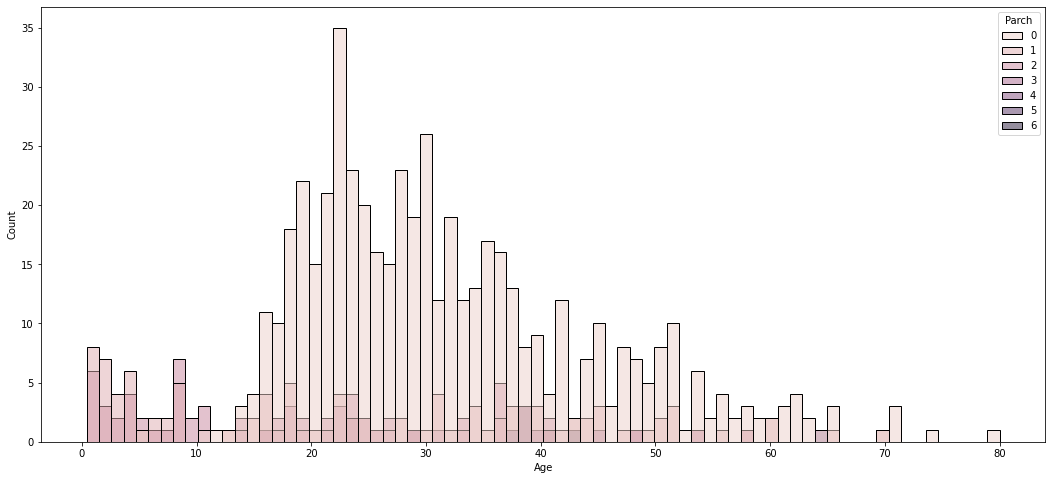

In [18]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="Age", hue="Parch", bins=74)

Родители-детишки были на корабле вместе с людьми 20-30 лет

<AxesSubplot:xlabel='Age', ylabel='Count'>

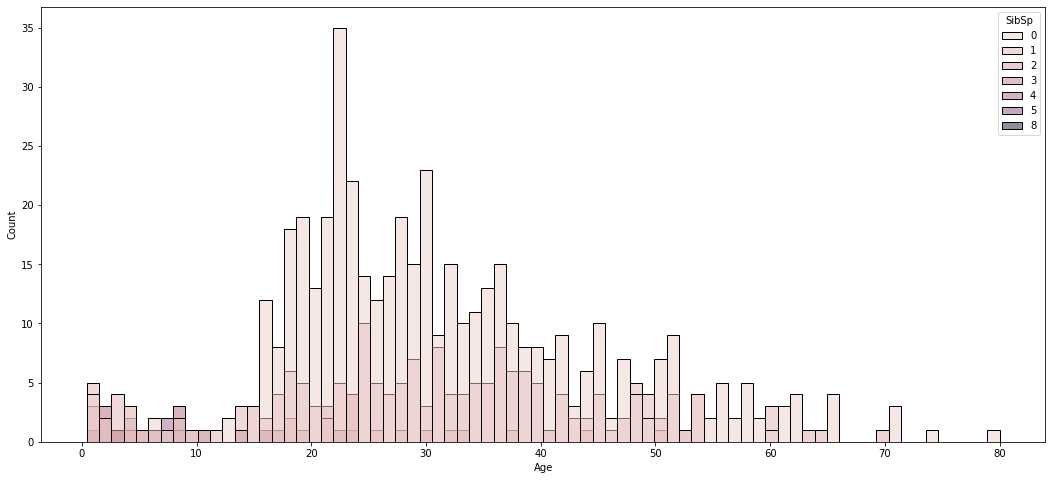

In [19]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="Age", hue="SibSp", bins=74)

Родственники-суженые были на корабле в основном с людьми 20-30 лет

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

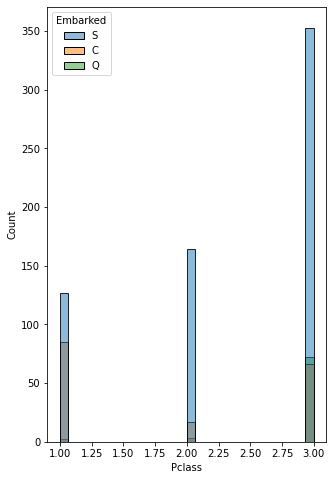

In [26]:
plt.figure(figsize=(5,8))
sns.histplot(data=df, x="Pclass", hue="Embarked", bins=30)

Распределение портов загрузки пассажиров в зависимости от класса билета

# 2. Заполнение пропусков и обработка выбросов в данных

## Пропуски в данных

Не дискретные данные.

In [44]:
df.loc[df['Age'].isna(), 'Age'] = (
    df['Age'].median())

Если дискретные данные

In [43]:
df.loc[df['Cabin'].isna(), 'Cabin'] = (
    df['Cabin'].mode()[0])

In [45]:
df.loc[df['Embarked'].isna(), 'Embarked'] = (
    df['Embarked'].mode()[0])

Проверка

In [46]:
df.isnull().values.any()

False

## Выбросы

In [47]:
df.select_dtypes(include=["int", "float"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [48]:
df.select_dtypes(include=["int", "float"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.3616,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,13.0197,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,22.0000,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,35.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


<AxesSubplot:xlabel='Fare'>

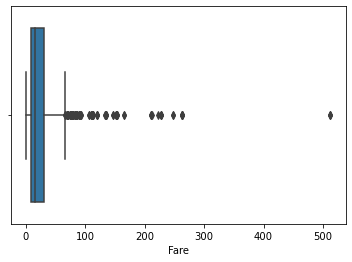

In [53]:
sns.boxplot(x=df["Fare"])

# 3. Преобразование признаков

Скопируем наш набор данных до преобразований

In [70]:
dt = (df
      .copy()
      .drop(labels=['PassengerId', 'Name'], 
            axis=1))
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


## 3.1 Sex

In [78]:
dt.rename(columns={'Sex':'IsMale'}, inplace=True)
dt

,Survived,Pclass,IsMale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [89]:
dt.loc[dt['IsMale'] == 'male', 'IsMale'] = 1
dt.loc[dt['IsMale'] == 'female', 'IsMale'] = 0
dt['IsMale'].describe()

count     891
unique      2
top         1
freq      577
Name: IsMale, dtype: int64

## 3.2 Ticket

In [100]:
tickets = pd.unique(dt['Ticket'])
for i in range(len(tickets)):
    dt.loc[dt['Ticket'] == tickets[i], 
           'Ticket'] = i

dt['Ticket'].describe()

count     891
unique    681
top        13
freq        7
Name: Ticket, dtype: int64

count     891
unique    681
top        13
freq        7
Name: Ticket, dtype: int64

## 3.3 Cabin

In [96]:
cabins = pd.unique(dt['Cabin'])
for i in range(len(cabins)):
    dt.loc[dt['Cabin'] == cabins[i], 
           'Cabin'] = i

dt['Cabin'].describe()

count     891
unique    147
top         0
freq      691
Name: Cabin, dtype: int64

## 3.4 Embarked

In [97]:
embarked = pd.unique(dt['Embarked'])
for i in range(len(embarked)):
    dt.loc[dt['Embarked'] == embarked[i], 
           'Embarked'] = i

dt['Embarked'].describe()

count     891
unique      3
top         0
freq      646
Name: Embarked, dtype: int64

In [108]:
obj_columns = [
    'IsMale', 'Ticket', 'Cabin', 'Embarked']
dt[obj_columns] = (
    dt[obj_columns].apply(pd.to_numeric))
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   IsMale    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int64  
 9   Embarked  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 108.9 KB


## 3.9 Шкалирование данных

In [109]:
sc = StandardScaler()
X_ = sc.fit_transform(dt.select_dtypes(exclude=(object)))
X_

array([[-0.78927234,  0.82737724,  0.73769513, ..., -0.50244517,
        -0.43758829, -0.56883712],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.78684529,
        -0.40861087,  1.00518113],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.48885426,
        -0.43758829, -0.56883712],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ..., -0.17626324,
        -0.43758829, -0.56883712],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.04438104,
         3.79311479,  1.00518113],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.49237783,
        -0.43758829,  2.57919938]])

In [110]:
rs = RobustScaler()
Xr = rs.fit_transform(dt.select_dtypes(exclude=(object)))
Xr

array([[  0.        ,   0.        ,   0.        , ...,  -0.3120106 ,
          0.        ,   0.        ],
       [  1.        ,  -2.        ,  -1.        , ...,   2.46124229,
          1.        ,   1.        ],
       [  1.        ,   0.        ,  -1.        , ...,  -0.28277666,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,  -1.        , ...,   0.38960398,
          0.        ,   0.        ],
       [  1.        ,  -2.        ,   0.        , ...,   0.67328148,
        146.        ,   1.        ],
       [  0.        ,   0.        ,   0.        , ...,  -0.29035583,
          0.        ,   2.        ]])

# 4. Baseline решение

## 4.1. Решение без преобразования признаков. На тех столбцах,которые можно использовать исходно

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [116]:
X = (df
     .select_dtypes(include=(int, float))
     .drop(labels='Survived', axis=1))
y = df['Survived']

In [117]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,28.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


Разделение набора данных на тренировочный и тестовый наборы

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [119]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [120]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [121]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.7134831460674157

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [122]:
logreg.score(X_test, y_test)

0.6759776536312849

Так как качество модели на тестовых данных не уменьшилось, то можно сказать, что модель не переобучилась и обрела достаточно хорошую обощающую способность.

Но качество 79% не идеально! Давайте попробуем улучшить

## 4.2. Решение c преобразованиtv признаков. Но без шкалирования признаков

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [130]:
X = dt.drop(labels='Survived', axis=1)
y = dt['Survived']

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   IsMale    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 101.9 KB


Разделение набора данных на тренировочный и тестовый наборы

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [133]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [134]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [137]:
logreg = LogisticRegression(random_state=42)
logreg.max_iter = 1000
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.800561797752809

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [138]:
logreg.score(X_test, y_test)

0.8100558659217877

## 4.3. Шкалированные данные

### StandartScaller

Разделение набора данных на тренировочный и тестовый наборы

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [140]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [141]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [142]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

1.0

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [143]:
best_score = logreg.score(X_test, y_test)
best_score

1.0

### RobustScaller

In [144]:
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [146]:
logreg = LogisticRegression(random_state=42)
logreg.max_iter = 1000
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

1.0

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [147]:
logreg.score(X_test, y_test)

1.0

# 5. POST анализ модели

In [148]:
predict = logreg.predict(X_test)
predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [149]:
features_name = dt.select_dtypes(exclude=["object"]).columns
print(f"Параметр b0: {logreg.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name, logreg.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-4.55304007]
Значениея остальных параметров бетта:
Survived 7.1069158834147075
IsMale -1.0570582585564663
Pclass -0.3419998550792956
Age -0.23471065061372237
Embarked 0.15868837500639218
SibSp -0.1290838761313298
Ticket -0.06451162807828366
Fare 0.056130678508386225
Parch -0.020811012234694937
Cabin 0.00579247627356579


In [150]:
np.where(np.abs(logreg.coef_[0]) > 0.5)[0]

array([0, 2], dtype=int64)

In [151]:
threshold = 0.2
print(len(np.where(np.abs(logreg.coef_[0]) > threshold)[0]), X_.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
logreg_ = LogisticRegression(random_state=42)
logreg_.fit(X_train, y_train)
print(logreg_.score(X_train, y_train))
print(logreg_.score(X_test, y_test))
print(f"first best score: {best_score}")
logreg_.score(X_test, y_test) > best_score

4 10
1.0
1.0
first best score: 1.0


False

In [152]:
dt.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns

Index(['Survived', 'Pclass', 'IsMale', 'Age'], dtype='object')

In [153]:
features_name_ = dt.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns
print(f"Параметр b0: {logreg_.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name_, logreg_.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-1.39899574]
Значениея остальных параметров бетта:
Survived 4.62534149738357
IsMale -0.5192940766269071
Pclass -0.37574893295040923
Age -0.15407809551711993
